<h1 style='font-size:40px'> Unsupervised Learning Techniques</h1>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            A tarefa do ML Não-Supervisionado é o de distinguir instâncias do dataset conforme as suas características, sem precisar de um valor-alvo.
        </li>
        <li> 
            Sua necessidade surge em casos em que não sabemos quantos ou quais tipos de instâncias existem; ou quando o volume de dados é tão grande que seria impossível humanos manualmente os rotularem. 
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Tipos de Unsupervised Learning</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            <em> Clustering:</em> Busca agrupar as instâncias conforme suas características.
        </li>
        <li> 
            <em> Anomaly Detection:</em> Útil para limpeza de datasets. Também é usado como detector de defeitos em linhas de produção e de novas tendências em séries temporais.
        </li>
        <li> 
            <em> Density Estimation:</em> Calcula a Probability Density Function (PDF) do processo aleatório que gerou o dataset. É comumente usado em deteção de anomalias.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Clustering</h2>
<h3 style='font-size:30px;font-style:italic'> Aplicações</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            <em>Análise de Dados:</em> Os algoritmos de clustering podem encontrar agrupamentos entre as instâncias do dataset, permitindo a nós analisá-los separadamente.
        </li>
        <li> 
            <em>Redução de Dimensionalidade:</em> As instâncias do dataset podem ter o seu grau de afinidade com os clusters medido. Dessa forma, o vetor de features é substituído por um vetor com os graus de afinidade. 
        </li>
        <li> 
            <em>Detecção de Anomalia:</em> Instâncias com baixa compatibilidade com os agrupamentos gerados podem ser rotuladas como exceções. 
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> K-Means</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O K-Means é um algoritmo de clustering muito conhecido. Devemos informar quantos agrupamentos pretendemos identificar ao utilizá-lo.
        </li>
        <li> 
            Ele, primeiramente, insere k centróides no plano aleatoriamente. As instâncias de treino são designadas ao núcleo mais próximo, tendo este a sua posição atualizada com a média das coordenadas dos pontos sob seu pertence. Após isso, uma nova fase de designação ocorre com os mesmos procedimentos. Esse processo se repete até que os centróides tenham as suas posições estabilizadas.
        </li>
    </ul>
</div>

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y = make_blobs(n_samples=100, centers=4)

# Fazendo o K-Means identificar as 4 aglomerações criadas.
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

# Mostrando as previsões do K-Means.
kmeans.predict(X)

array([1, 0, 0, 3, 2, 3, 1, 2, 1, 1, 1, 3, 3, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       3, 2, 3, 2, 3, 0, 3, 0, 2, 2, 3, 2, 3, 3, 2, 1, 3, 1, 0, 1, 3, 0,
       2, 1, 2, 0, 0, 3, 2, 0, 3, 2, 0, 0, 2, 3, 2, 3, 1, 0, 3, 3, 0, 0,
       1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 1, 0, 3, 1, 1, 0, 0, 3, 2, 3, 3, 1,
       3, 1, 3, 3, 0, 2, 1, 1, 2, 1, 1, 2], dtype=int32)

In [9]:
# As previsões feitas sobre o dataset de treino podem ser visualizadas com o atributo 'labels_'.
kmeans.labels_

array([1, 0, 0, 3, 2, 3, 1, 2, 1, 1, 1, 3, 3, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       3, 2, 3, 2, 3, 0, 3, 0, 2, 2, 3, 2, 3, 3, 2, 1, 3, 1, 0, 1, 3, 0,
       2, 1, 2, 0, 0, 3, 2, 0, 3, 2, 0, 0, 2, 3, 2, 3, 1, 0, 3, 3, 0, 0,
       1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 1, 0, 3, 1, 1, 0, 0, 3, 2, 3, 3, 1,
       3, 1, 3, 3, 0, 2, 1, 1, 2, 1, 1, 2], dtype=int32)

In [10]:
# 'cluster_centers_' revela as coordenadas dos centróides.
kmeans.cluster_centers_

array([[ 4.05955887, -1.11838989],
       [-5.16779115, -8.87428925],
       [-2.45843286,  6.14138294],
       [ 1.76016733,  2.15369352]])

In [12]:
# O método 'transform' nos revela a distância entre as instâncias e os centróides.

# O seu output pode ser usado como substituto das features, configurando uma redução de dimensionalidade.
kmeans.transform(X)[:5]

array([[12.42919372,  0.59193303, 15.8375878 , 13.51875337],
       [ 1.14903207, 12.86673056, 10.64732843,  4.84303955],
       [ 0.7859479 , 12.3152267 , 10.51491467,  4.73439033],
       [ 3.43722127, 12.434918  ,  6.31925756,  0.70846129],
       [10.10814833, 15.65516195,  0.41846547,  6.13946365]])

<h3 style='font-size:30px;font-style:italic'> Centroid Initialization Methods</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O K-Means possui o risco de convergir para uma solução sub-ótima. Considerando isso, há diversas maneiras de evitarmos essa situação.
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> n_init</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            n_init controla a quantidade de k-means que são executados. O modelo retornado é aquele em que as instâncias tenham a menor distância ao quadrado de seus respectivos centróides (essa métrica pode ser encontrada no atributo <em>inertia_</em>).
        </li>
    </ul>
</div>

In [23]:
# Rodaremos aqui 20 K-Means.
kmeans = KMeans(n_clusters=4,n_init=20, random_state=42).fit(X)

# A distância ao quadrado média das instâncias aos centróides.
kmeans.inertia_

189.7486358001815

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> init</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Se você vier a saber aproximadamente onde os centróides podem se localizar, passe um array do numpy com as coordenadas ao atributo <em> init</em>.
        </li>
    </ul>
</div>

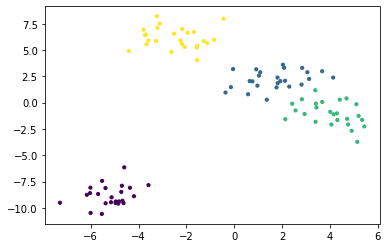

In [20]:
# Vamos usar a visualização das instâncias como base para o nosso array.
from matplotlib.pyplot import scatter
scatter(X[:,0], X[:,1], c=y, s=10)

In [22]:
import numpy as np
init = np.array([[-5, -8], [-3,6], [1, 2.5], [3,0]])
kmeans = KMeans(n_clusters=4,init=init, n_init=1).fit(X)
kmeans.inertia_

189.7486358001815

<h3 style='font-size:30px;font-style:italic'> Mini-batch K-Means</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como com o Incremental PCA e o Mini-batch Gradient Descent, o Mini-batch K-Means é recomendável para datasets que não cabem na memória. Em cada iteração, uma pequena parcela dos dados embasam a mudança de posição dos centróides.
        </li>
        <li> 
            Apesar de convergir mais rapidamente, esse algoritmo costuma ter inércias piores do que o K-Means tradicional para um mesmo número de clusters. 
        </li>
    </ul>
</div>

In [28]:
from sklearn.cluster import MiniBatchKMeans
mini_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=int(len(X)/5)).fit(X)

# Observe que a inércia do Mini-batch K-Means ficou pior.
mini_kmeans.inertia_

191.59032965834382

<h3 style='font-size:30px;font-style:italic'> Finding the Optimal Number of Clusters</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Em um dataset real, de inúmeras dimensões, encontrar o número ideal de clusters para o K-Means é algo dificultoso. Para isso, há o <em>silhouette score</em>, que mede o quanto os clusters estão bem segregados. Um valor de +1 indica que as instâncias estão bem inseridas em seus agrupamentos e longe dos demais; 0 alerta que os dados estão próximos a clusters vizinhos; por último, -1 sinaliza que as instâncias podem ter sido designadas aos agrupamentos errados.
        </li>
    </ul>
</div>

In [ ]:
kmeans.labels_

In [43]:
n_clusters = list(range(2,8))

[2, 3, 4, 5, 6, 7]

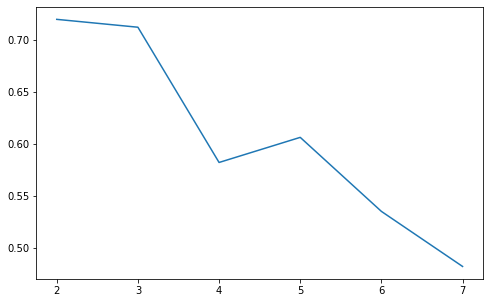

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# O dataset deste caso terá 5 centros.
X,y = make_blobs(n_samples=100, centers=5)

plt.figure(figsize=(8,5))
silhouettes = []
n_clusters_ = list(range(2,8))
# Vamos montar um gráfico que expõe os silhouette scores para diferentes 'n_clusters'.
for n_clusters in n_clusters_:
    kmeans = KMeans(n_clusters=n_clusters, n_init=15).fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
    
plt.plot(n_clusters_, silhouettes)

# Silhouette diagram Yellowbrick: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

<p style='color:red'> Trecho grifado (p. 249). Montar o silhouette diagram instalando o Yellowbrick